<a href="https://colab.research.google.com/github/SrvPioneer/Ayushman_Bharat_Healthcare_Claim_Analysis/blob/main/Ayushman_Bharat_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ayushman Bharat Scheme**

Ayushman Bharat is National Health Protection Scheme, which will cover over 10 crore poor and vulnerable families (approximately 50 crore beneficiaries) providing coverage upto 5 lakh rupees per family per year for secondary and tertiary care hospitalization. Ayushman Bharat - National Health Protection Mission will subsume the on-going centrally sponsored schemes - Rashtriya Swasthya Bima Yojana (RSBY) and the Senior Citizen Health Insurance Scheme (SCHIS).

#**Objective**

This dataset contain 5 months 15 days information from 1st january to 15th june 2023 about medical insurance claim from variours insurance organization through ayushman bharat scheme in Jharkhand. In this project, we can gain several insights related to healthcare claims. Here are some potential insights we can extract:

Case Number: In the provided dataset, the "Case Number" refers to a unique identifier assigned to each individual healthcare claim case. It is a reference number or code that helps in identifying and tracking specific claims throughout the claims processing workflow. The Case Number serves as a unique identifier for a particular claim and is used to reference and retrieve information related to that claim.

Family id : It is a reference number that helps link multiple individuals who are part of the same family or have a common insurance policy. The Family ID enables the tracking and management of claims and other relevant information related to the insurance coverage of the associated family members.

Gender: It refers to the categorization of individuals based on their biological sex. It indicates the gender identity of the patients involved in the healthcare claims.

Patient's Home District : It indicates the geographic location or district of the patient's primary residence. This information helps in identifying the patient's locality or region for healthcare administrative and logistical purposes.

Claim Status: We can analyze the status of claims and understand the distribution of different claim statuses, such as approved, rejected, or pending. This insight can help identify bottlenecks and areas for improvement in the claims processing workflow.

Speciality : In the provided dataset, "Speciality" refers to the medical specialization or field of expertise related to the healthcare treatment or procedure associated with each claim. It indicates the specific area of medicine that the healthcare provider or medical practitioner specializes in, based on the type of treatment provided to the patient.

treating_doc_name: The "treating_doc_name" field contains the name of the doctor or healthcare provider who is primarily responsible for managing the patient's treatment during their hospitalization or medical care. This information helps in identifying and tracking the healthcare provider involved in the patient's treatment for each specific claim case.

Admission Data : In the given dataset, "Admission Date" refers to the date when the patient was admitted to the hospital or healthcare facility for medical treatment or care related to the specific healthcare claim. It indicates the exact date on which the patient's hospitalization or medical treatment began for the claim in question.

Discharge Date: In the provided dataset, "Discharge Date" refers to the date when the patient was discharged from the hospital or healthcare facility after receiving medical treatment or care related to the specific healthcare claim. It indicates the exact date on which the patient's hospitalization or medical treatment ended for the claim in question.

Approval and Rejection Patterns: We can identify patterns in pre-authorization approval and rejection rates. This information can help in understanding the criteria used for approval or rejection and identify any inconsistencies or areas for improvement in the decision-making process.

Claim Amount Analysis: Analyzing the claim amounts paid by insurance companies can provide insights into the average cost of different medical procedures or treatments. This information can be useful for cost analysis, budgeting, and negotiating contracts with healthcare providers.

Hospital and District Analysis: By examining the data related to hospitals and districts, We can gain insights into the distribution of claims across different healthcare facilities and geographic areas. This analysis can help identify patterns, resource utilization, and healthcare access disparities.

Processing Time: Analyzing the time taken for claim processing, from submission to payment, can provide insights into the efficiency of the claims processing system. This analysis can help identify any delays or areas where process improvements can be made to expedite claims processing.


These insights can support decision-making processes for healthcare administrators, insurance companies, policymakers, and other stakeholders involved in healthcare claims management. It can help optimize workflows, identify areas for improvement, and enhance the overall efficiency and effectiveness of the claims processing system.

# **Approach**

In [140]:
#Necessary Libraries
import numpy as np
import plotly
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [141]:
#Import data from drive
dataset = pd.read_excel("/content/drive/MyDrive/Data_Science_2.0/Ayushma_Bharat_Insurance_Project/Ayushman_Bharat.xlsx")

In [232]:
#Features selection
Feature_selection_df = dataset[["Case Number", "Claim_Status", "Family ID", "Gender", "Patient's Home District", "Speciality","treating_doc_name", "Hospital Name", "Hospital District", "Admission Date", "Discharge Date", "Claim Raised Date", "Claim Paid Date","Amount paid to Hospital","Claim Paid Amount","Procedure"]]

In [233]:
#create a duplicate of original dataset
df = Feature_selection_df.copy()
df.shape

(170228, 16)

In [234]:
#Removed record
df["Admission Date"] = pd.to_datetime(df["Admission Date"])
df["Year"] = df["Admission Date"].dt.year
df = df.dropna(subset = ["Year"])
# df["Year"].shape
df["Year"] = df["Year"].astype(int)
df = df[df["Year"]== 2023]
df.shape

(169108, 17)

This dataset contain less information from 2021 and 2022 so, I have removed those data point from dataset for more accurate result.

In [236]:
#Display dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df.head(5)

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [237]:
#Features in dataset
df.columns

Index(['Case Number', 'Claim_Status', 'Family ID', 'Gender',
       'Patient's Home District', 'Speciality', 'treating_doc_name',
       'Hospital Name', 'Hospital District', 'Admission Date',
       'Discharge Date', 'Claim Raised Date', 'Claim Paid Date',
       'Amount paid to Hospital', 'Claim Paid Amount', 'Procedure', 'Year'],
      dtype='object')

In [238]:
#Brief information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169108 entries, 0 to 170227
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Case Number              169108 non-null  object        
 1   Claim_Status             160686 non-null  object        
 2   Family ID                169108 non-null  object        
 3   Gender                   169108 non-null  object        
 4   Patient's Home District  169108 non-null  object        
 5   Speciality               169107 non-null  object        
 6   treating_doc_name        147047 non-null  object        
 7   Hospital Name            169108 non-null  object        
 8   Hospital District        169108 non-null  object        
 9   Admission Date           169108 non-null  datetime64[ns]
 10  Discharge Date           146457 non-null  datetime64[ns]
 11  Claim Raised Date        142861 non-null  datetime64[ns]
 12  Claim Paid Date 

In [239]:
df.shape

(169108, 17)

In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount paid to Hospital,169108.0,6561.135369,10313.589897,0.0,0.0,2310.0,7155.0,100000.0
Claim Paid Amount,169108.0,6561.135369,10313.589897,0.0,0.0,2310.0,7155.0,100000.0
Year,169108.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0


In [241]:
df.describe(include = "all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Case Number,169108,169108,CASE/PS5/HOSP20G12233/P2232499,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claim_Status,160686,10,Claim Paid,116528,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family ID,169108,128146,55d6f0dd-7dac-477f-9d28-41bec0a80129,69,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,169108,3,Female,95711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient's Home District,169108,24,RANCHI,31470,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Speciality,169107,30,General Medicine,53704,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treating_doc_name,147047,3154,72467,1943,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital Name,169108,974,Sadar Hospital,19451,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital District,169108,159,RANCHI,47616,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Admission Date,169108,166,2023-02-20 00:00:00,2196,2023-01-01 00:00:00,2023-06-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Checking case number on different claim status

In [242]:
#Checking unique value
df["Claim_Status"].unique()

array(['Claim Paid', 'Claim Yet To be Initiated', nan, 'Claim Approved',
       'Claim Rejected', 'Claim Under Query', 'Claim Under Process',
       'Claim Cancelled', 'Claim under Process',
       'Claim Yet to be Initiated', 'Claim Yet to be initiated'],
      dtype=object)

In [243]:
#Create seperate dataframe and remove null claim status
claim_result_df = df[~df["Claim_Status"].isnull()]
claim_result_df = claim_result_df[["Case Number","Claim_Status"]]

In [244]:
claim_result_df.shape

(160686, 2)

In [245]:
claim_result_df.isnull().sum()

Case Number     0
Claim_Status    0
dtype: int64

In [246]:
#Handling case sencetive
df[df["Claim_Status"] =="Claim Yet To be Initiated"]="Claim Yet to be initiated"
df[df["Claim_Status"] =="Claim Yet to be Initiated"]="Claim Yet to be initiated"
df[df["Claim_Status"] =="Claim Under Process"]="Claim under Process"

In [247]:
#Counting case number on different claim status
claim_result_count = df.groupby("Claim_Status")["Case Number"].count()

In [248]:
pd.DataFrame(claim_result_count)

,Case Number
Claim_Status,
Claim Approved,15653
Claim Cancelled,41
Claim Paid,116528
Claim Rejected,2795
Claim Under Query,3846
Claim Yet to be initiated,18356
Claim under Process,3467


In [249]:
#Total case
claim_result_df["Case Number"].count()

160686

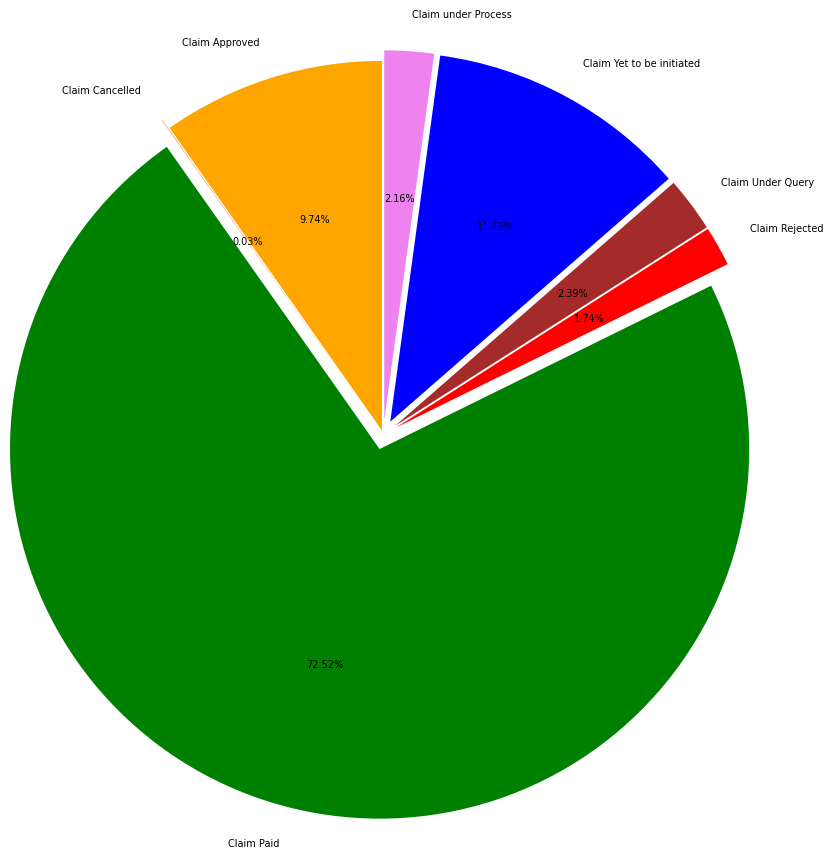

In [250]:
#Create visulization for different status count
plt.pie(claim_result_count, labels = ["Claim Approved","Claim Cancelled","Claim Paid", "Claim Rejected", "Claim Under Query", "Claim Yet to be initiated","Claim under Process"],
        explode = [0.03,0.1,0.1,0.1,0.1, 0.1,0.1], colors = ["Orange", "Coral", "Green", "Red", "Brown", "Blue", "Violet"], autopct = "%0.2f%%", radius = 2.5,
        textprops = {"fontsize":7}, startangle = 90)
plt.show()

Above pie chart clearly expressed that 72.52% claim has been paid, 0.03% claim has been cancelled, 9.74% has been approved, 2.16%  claim has been under process, 11.42% claim has been yet to be initiated, 2.39% claim has been under query, 1.74% claim has been rejected.

#Bringing an analysis on family id, gender and patient's home district with respect to case number

In [251]:
df.head(5)

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [252]:
#Analysis a report for each family taking benefit from this scheme
family_df = df[["Case Number", "Family ID"]]
family_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169108 entries, 0 to 170227
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Case Number  169108 non-null  object
 1   Family ID    169108 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [253]:
family_count = df.groupby(["Family ID"])["Case Number"].count()
family_count_df = family_count.to_frame()
family_count_df.reset_index(inplace = True)
family_count_df.head()

,Family ID,Case Number
0,0007e634-fe82-11e7-8194-00155db81f16,1
1,00085062-0bbb-11ec-a09c-00155db84206,1
2,00097025-bdac-41c5-879e-07a588f84c2c,2
3,000d45c5-b724-11e8-98a0-00155db81f2a,1
4,00103f48-fc7f-11e9-8978-00155db81f2a,1


In [254]:
family_count_df = family_count_df.sort_values(by = ["Case Number"], ascending = False)
family_count_df.head(50)

,Family ID,Case Number
94626,Claim Yet to be initiated,18354
94627,Claim under Process,3465
45331,55d6f0dd-7dac-477f-9d28-41bec0a80129,56
20854,201900370320027068810067,51
54771,5726fdce-c534-4806-9fab-4b73c0a80129,50
107507,d06cbcdd-7ec7-11e5-a727-d89d671b89d8,49
52849,571f0d65-fb3c-482c-8c79-4414c0a80129,40
96926,af34e807-7b4d-11eb-8c97-00155db81f2a,39
104812,cd29f31d-7ec4-11e5-a727-d89d671b89d8,39
44959,55d60f0a-be54-4a84-9de2-4255c0a80129,38


After observing family ID, I found that inside family id by mistakenly data control team updated claim status in few rows. So, maintain redundancy and get accurate result I have removed those unwanted family id from family id column.

In [255]:
#Removed family Id
family_count_df = family_count_df.drop(index = [94626, 94627])
family_count_df.head()

,Family ID,Case Number
45331,55d6f0dd-7dac-477f-9d28-41bec0a80129,56
20854,201900370320027068810067,51
54771,5726fdce-c534-4806-9fab-4b73c0a80129,50
107507,d06cbcdd-7ec7-11e5-a727-d89d671b89d8,49
52849,571f0d65-fb3c-482c-8c79-4414c0a80129,40


In [256]:
#Family raised claimed more that one time
family_claim_raised_more_than_one = family_count_df[family_count_df["Case Number"]>1]
number_of_family_claim_raised = len(family_claim_raised_more_than_one)
number_of_family_claim_raised

22754

More than one time insurance claim raised family number 22756 through ayushman bharat scheme from various insurance organization.

In [257]:
#Claim settle analysis by family
family_claim_settle = df[["Case Number", "Family ID", "Claim_Status"]]
family_claim_settle = family_claim_settle[family_claim_settle["Claim_Status"].isin(["Claim Approved", "Claim Paid"])]
family_claim_settle.shape

(132181, 3)

In above dataframe have taken claim approved and claim paid status because these two status directly indicate that beneficiaries received or sure to receive their claim.

In [258]:
#Family settled claimed more that one time
family_count_claim_settle_df= family_claim_settle[["Case Number", "Family ID"]]
family_count_claim_settle = family_count_claim_settle_df.groupby(["Family ID"])["Case Number"].count()
claim_settle_df = family_count_claim_settle.to_frame()
claim_settle_df.reset_index(inplace = True)
claim_settle_df.head()

,Family ID,Case Number
0,0007e634-fe82-11e7-8194-00155db81f16,1
1,00085062-0bbb-11ec-a09c-00155db84206,1
2,00097025-bdac-41c5-879e-07a588f84c2c,2
3,000d45c5-b724-11e8-98a0-00155db81f2a,1
4,00103f48-fc7f-11e9-8978-00155db81f2a,1


In [259]:
#Family settled claimed more that one time
family_claim_settle_more_than_one = claim_settle_df[claim_settle_df["Case Number"] >1]
number_of_family_claim_settled =  len(family_claim_settle_more_than_one)
number_of_family_claim_settled

18594

In [260]:
#Percentage of family settled claim those got benefit more than one time
more_than_one_benefit_family_percentage = round((number_of_family_claim_settled/number_of_family_claim_raised)*100,2)
more_than_one_benefit_family_percentage

81.72

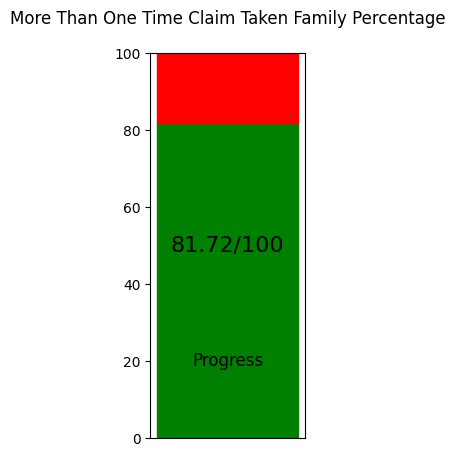

In [261]:
def create_thermometer_chart(progress, goal):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize = (2,5))

    # Set the y-axis limits
    ax.set_ylim(0, goal)

    # Plot the filled thermometer segment
    ax.fill_between([0, 1], 0, progress, color='green')

    # Plot the empty thermometer segment
    ax.fill_between([0, 1], progress, goal, color='red')

    # Hide the x-axis
    ax.set_xticks([])
    #Title
    ax.set_title("More Than One Time Claim Taken Family Percentage\n")

    # Add labels
    ax.text(0.5, goal * 0.5, f"{progress}/{goal}", ha='center', va='center', fontsize=16)
    ax.text(0.5, goal * 0.2, "Progress", ha='center', va='center', fontsize=12)

    # Show the chart
    plt.show()

# Example usage
create_thermometer_chart(more_than_one_benefit_family_percentage, 100)

In [262]:
len(df[~df["Gender"].isin(["Claim under Process", "Claim Yet to be initiated"])])

147289

In [263]:
# What is the most common gender who all got benefit from this scheme
gender_df = df[["Case Number", "Gender"]]
gender_df = gender_df[~gender_df["Gender"].isin(["Claim under Process", "Claim Yet to be initiated"])]
gender_r_df = gender_df.groupby(["Gender"])["Case Number"].count()
gender_report_df = gender_r_df.to_frame()
gender_report_df.reset_index(inplace = True)
# gender_report_df.sum()
gender_report_df

,Gender,Case Number
0,Female,83064
1,Male,64222
2,Transgender,3


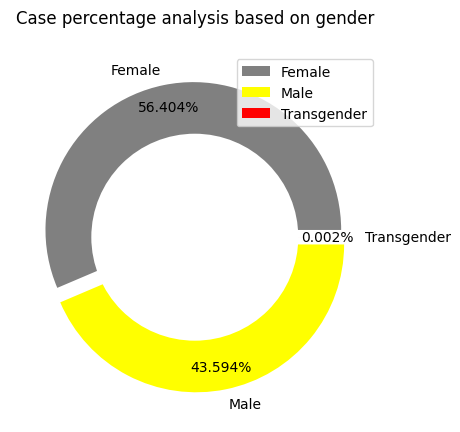

In [264]:
# Setting size in Chart based on
# given values
sizes = [83452, 64498, 3]

# Setting labels for items in Chart
labels = ['Female', 'Male', 'Transgender']

# colors
colors = ['Gray', 'Yellow', 'Red']

# explosion
explode = (0.05, 0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.3f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Case percentage analysis based on gender\n')

# Add Legends
plt.legend(labels, loc="upper right")

# Displaying Chart
plt.show()

Above donut chart clrealy highlighted that most of female gender got benefit through this scheme around 56.4% and than male with 43.6% and transgender 0.002%.

In [265]:
#Case number based on patinet home district
dist_df = df[["Case Number", "Patient's Home District"]]
# dist_df.info()
# dist_df["Patient's Home District"].unique()
# dist_df[dist_df["Patient's Home District"].isin(["Claim Yet to be initiated", "Claim under Process"])].shape
# dist_df.shape
dist_df = dist_df[~dist_df["Patient's Home District"].isin(["Claim Yet to be initiated", "Claim under Process"])]
# dist_df.shape
case_count = dist_df.groupby(["Patient's Home District"])["Case Number"].count()
dist_case_count = case_count.to_frame()
dist_case_count.reset_index(inplace = True)
# dist_case_count.head()
dist_case_count = dist_case_count.sort_values(by = ["Case Number"], ascending = False)
# dist_case_count["Case Number"].sum()
dist_case_count = dist_case_count.set_index(pd.RangeIndex(start=0, stop=len(dist_case_count)))
dist_case_count

,Patient's Home District,Case Number
0,RANCHI,27151
1,EAST SINGHBUM,11705
2,GIRIDIH,8752
3,BOKARO,8379
4,DHANBAD,7798
5,KODERMA,7222
6,WEST SINGHBHUM,6891
7,PALAMU,6448
8,HAZARIBAGH,6437
9,DEOGHAR,6102


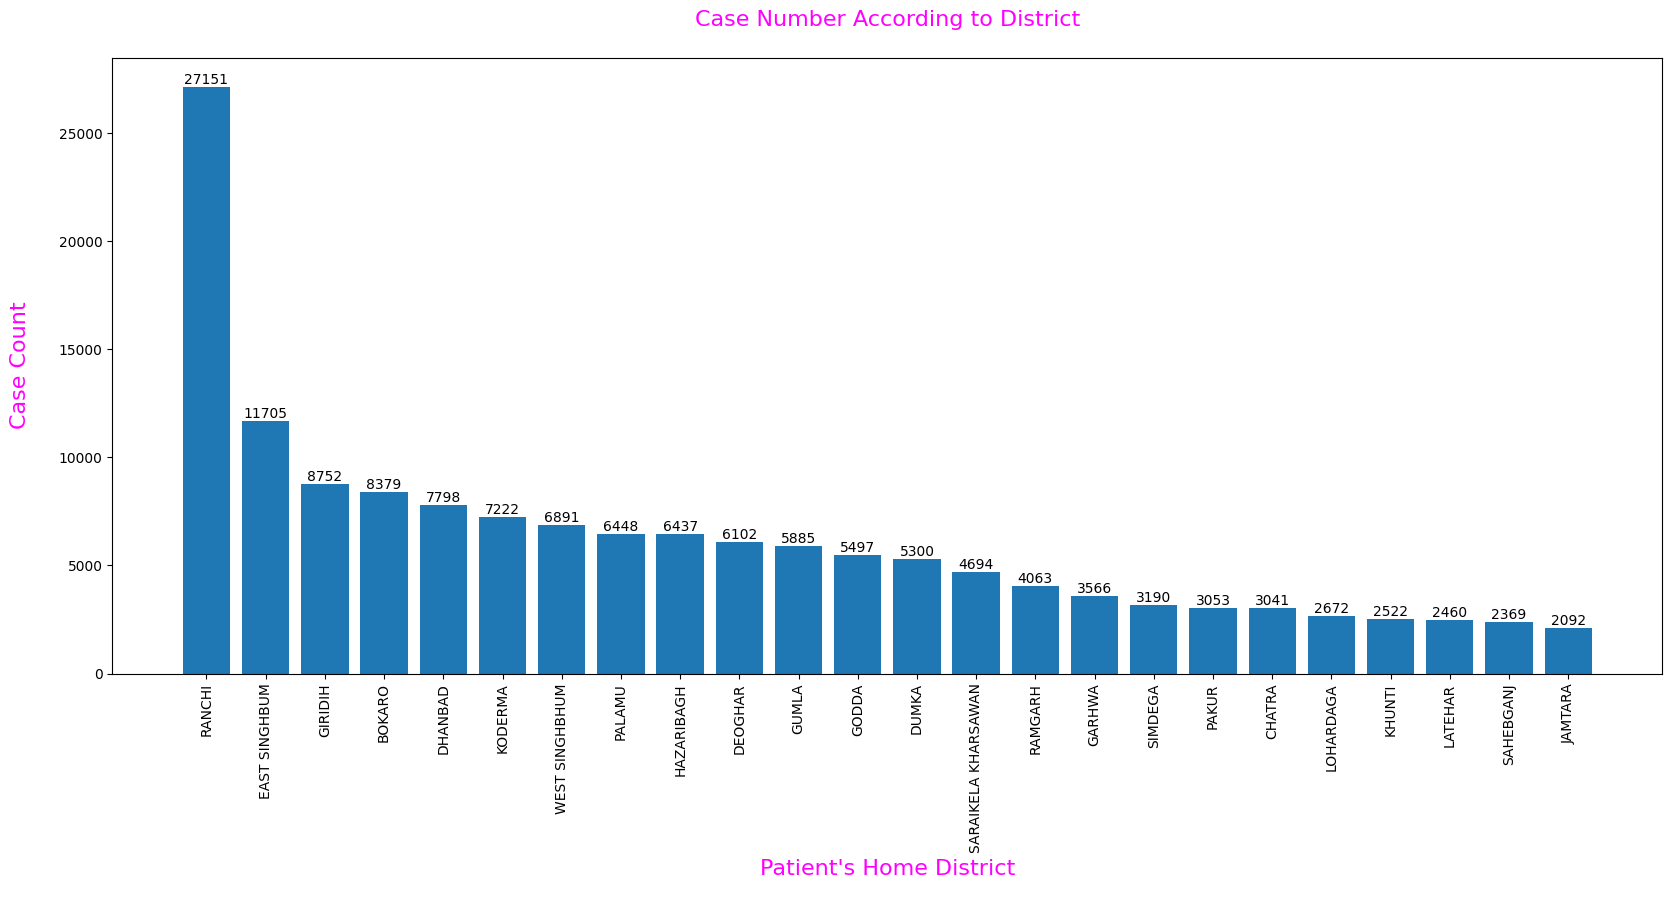

In [266]:
#Create visualization for above dataframe
def create_bar_plot(x_labels, y_values):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize = (20,8))

    # Create the bar plot
    bars = ax.bar(x_labels, y_values)

    # Add labels and title
    ax.set_xlabel("Patient's Home District\n", color='Magenta', fontsize=16)
    ax.set_ylabel('Case Count\n', color='Magenta', fontsize=16)
    ax.set_title('Case Number According to District\n', color='Magenta', fontsize=16)

     # Add data labels to each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    # Rotate x-axis labels if needed
    plt.xticks(rotation= 90)

    # Show the plot
    plt.show()

# Example usage
x_labels = list(dist_case_count["Patient's Home District"])
y_values = list(dist_case_count["Case Number"])
create_bar_plot(x_labels, y_values)

After observed district I found that high number of  cases are coming from Ranchi and low number of cases coming from Jamtara.

#Finding the doctor name who all are handled more cases with their speciality.

In [267]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [268]:
#Relevant dataframe
doct_df = df[["Case Number","Speciality","treating_doc_name"]]
# doct_df.info()
doct_df  = doct_df.dropna()
doct_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161340 entries, 0 to 170227
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Case Number        161340 non-null  object
 1   Speciality         161340 non-null  object
 2   treating_doc_name  161340 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


In [269]:
#Removing unnecessary value from "Speciality" column
# doct_df["Speciality"].unique()
doct_df = doct_df[~doct_df["Speciality"].isin(["Emergency Room Packages (Care requiring less than 12 hrs stay)", "Claim under Process", "Claim Yet to be initiated"])]
doct_df["Speciality"].unique()
# doct_df.info()

array(['Obstetrics   Gynaecology', 'General Medicine', 'Opthalmology',
       'General Surgery', 'Urology', 'Neo-natal care Packages',
       'Paediatric Medical management', 'Medical Oncology',
       'Orthopaedics', 'Radiation Oncology', 'Otorhinolaryngology',
       'Interventional Neuroradiology', 'Neurosurgery', 'Cardiology',
       'Paediatric surgery', 'Burns Management', 'Surgical Oncology',
       'Cardio-thoracic   Vascular surgery',
       'Cardio Thoracic Vascular surgery (CTVS)',
       'Plastic   reconstructive Surgery', 'Ophthalmology',
       'Oral and Maxillofacial Surgery', 'Obstetrics & Gynaecology',
       'Mental Disorders Packages', 'Paediatric Medical Management',
       'Infectious Diseases', 'Polytrauma', 'Paediatric Cancer'],
      dtype=object)

In [270]:
#Removing unnecessary value from "treating_doc_name" column
list_of_doct = list(doct_df["treating_doc_name"].unique())
list_of_docts = []
for i in list_of_doct:
  if i.isalpha():
    list_of_docts.append(i)
print(len(list_of_docts))

41


In [271]:
doct_df[doct_df["treating_doc_name"].isin(list_of_docts)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 352 to 166900
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case Number        730 non-null    object
 1   Speciality         730 non-null    object
 2   treating_doc_name  730 non-null    object
dtypes: object(3)
memory usage: 22.8+ KB


Once I have removed digit value from "treating_doc_name" column, it consider only 730 record and which is not considerable. In this case we can contact with client and can ask them the accurate record of doctor name or else we can take action based on these data and after getting proper informtaion from client end we can replace numerical value into doctor name. There will be chance that these numeric value can be doctor id number or any unique value which will identify each doctor individually.

In [272]:
doct_sp_df = doct_df.groupby(["Speciality","treating_doc_name"])["Case Number"].count()
docts_sp_df = doct_sp_df.to_frame()
docts_sp_df.reset_index(inplace = True)
docts_sp_df = docts_sp_df.sort_values(by = ["Case Number"], ascending = False).set_index(pd.RangeIndex(start = 0, stop= len(docts_sp_df)))
# docts_sp_df.info()
# docts_sp_df.shape
docts_sp_df.head(50)


,Speciality,treating_doc_name,Case Number
0,Medical Oncology,72467,1797
1,General Medicine,DR RUCHIKA,1506
2,General Medicine,DR RAJEEV RANJAN,1407
3,Opthalmology,31970,1263
4,Opthalmology,APMC/FMR/78112,922
5,Paediatric Medical management,32192,845
6,Obstetrics Gynaecology,Dr Kiran Kumari Chandel,822
7,Opthalmology,23147,762
8,General Medicine,Dr KD Choudhary,746
9,Medical Oncology,3439,716


Above table display top 50 doctor name who have handled more cases along with their spacility.

#Create a report of patient rush on each hospital base on district

In [273]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [274]:
#Create relevant dataframe
hos_df = df[["Case Number", "Hospital Name", "Hospital District"]]
# hos_df.info()
# hos_df["Hospital Name"].unique()
# len(hos_df["Hospital Name"].unique())

In [275]:
#Remove irrelevant record from "Hospital Name" column
hos_df = hos_df[~hos_df["Hospital Name"].isin(["Claim under Process", "Claim Yet to be initiated"])]
# hos_df.shape
# len(hos_df["Hospital Name"].unique())
hos_df.head()

,Case Number,Hospital Name,Hospital District
0,CASE/PS5/HOSP20G12233/P2232499,CHC CHANHO,RANCHI
1,CASE/PS5/HOSP20G12045/P2232504,Sadar Hospital,RANCHI
2,CASE/PS5/HOSP20P125326/P2232496,hopewell hospital,GODDA
3,CASE/PS5/HOSP20G12045/P2232507,Sadar Hospital,RANCHI
4,CASE/PS5/HOSP20G12045/P2232506,Sadar Hospital,RANCHI


In [276]:
#Checking irrelevant record from "Hospital District" column
# hos_df["Hospital District"].unique()
len(hos_df["Hospital District"].unique())

146

In [277]:
#Find patient rush of each hospital
hos_dict_df = hos_df.groupby(["Hospital District","Hospital Name"])["Case Number"].count()
hos_dict_df = hos_dict_df.to_frame()
hos_dict_df.reset_index(inplace = True)
hos_dict_df.sort_values(by = ["Case Number"], ascending = False).set_index(pd.RangeIndex(start = 0, stop = len(hos_dict_df))).head(50)

,Hospital District,Hospital Name,Case Number
0,RANCHI,Sadar Hospital,11721
1,KODERMA,DISTRICT HOSPITAL KODERMA,3260
2,EAST SINGHBUM,MAHATMA GANDHI MEMORIAL MEDICAL COLLEGE HOSPITAL JAMSHEDPUR,2659
3,WEST SINGHBHUM,Sadar Hospital Chaibasa,2288
4,RANCHI,Curie Abdur Razzaque Ansari Cancer Institute,1897
5,RANCHI,SHAMBHAVI CENTRE FOR CANCER AND GYNAECOLOGY,1871
6,EAST SINGHBUM,Sadar Hospital,1591
7,DHANBAD,Patliputra Medical College & Hospital,1446
8,PALAMU,CHC LESLIGANJ,1437
9,DHANBAD,Nayandeep Eye Hospital,1432


Above table express top 50 hospital name base on district attend maximum number of patient.

#What is the minimum and maximum discharge time

In [278]:
#Relevant dataframe
dis_df = df[["Admission Date", "Discharge Date"]]
dis_df= dis_df.dropna()
# dis_df.info()
dis_df.head()

,Admission Date,Discharge Date
0,2023-02-10 00:00:00,2023-02-11 06:30:00
1,2023-02-10 00:00:00,2023-02-11 18:30:00
2,2023-02-10 00:00:00,2023-02-11 23:50:00
3,2023-02-10 00:00:00,2023-02-11 18:30:00
4,2023-02-03 00:00:00,2023-02-10 10:10:00


In [279]:
#Remove irrelevant data from "Admission Date" and "Discharge Date" columns
dis_df = dis_df[~dis_df["Admission Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
dis_df = dis_df[~dis_df["Discharge Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]

In [280]:
#convert object datatype to datetime
dis_df ["Admission Date"] = pd.to_datetime(dis_df["Admission Date"])
dis_df ["Discharge Date"] = pd.to_datetime(dis_df["Discharge Date"])
dis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138881 entries, 0 to 169846
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Admission Date  138881 non-null  datetime64[ns]
 1   Discharge Date  138881 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.2 MB


In [281]:
dis_df.head()

,Admission Date,Discharge Date
0,2023-02-10,2023-02-11 06:30:00
1,2023-02-10,2023-02-11 18:30:00
2,2023-02-10,2023-02-11 23:50:00
3,2023-02-10,2023-02-11 18:30:00
4,2023-02-03,2023-02-10 10:10:00


In [282]:
#Finding treatement duration
dis_df["Treatement_duration"]  = dis_df["Discharge Date"] - dis_df["Admission Date"]
ad_dis_df = dis_df["Treatement_duration"].to_frame()
ads_dis_df = ad_dis_df.sort_values(by = ["Treatement_duration"], ascending = False).set_index(pd.RangeIndex(start = 0, stop = len(dis_df)))
ads_dis_df.head()

,Treatement_duration
0,130 days 15:15:00
1,128 days 15:25:00
2,119 days 19:50:00
3,113 days 15:45:00
4,107 days 13:05:00


In [283]:
#Max duration
pd.DataFrame(ads_dis_df.max())

,0
Treatement_duration,130 days 15:15:00


In [284]:
#Min duration
pd.DataFrame(ads_dis_df.min())

,0
Treatement_duration,0 days


Above observation said that maximum treatement time 130 days 15 hour and minimum 0 days.

#Patient admission count based on different time period

In [285]:
#Relevant dataframe
Time_df = df[["Case Number", "Admission Date"]]
Time_df = Time_df.dropna()
Time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169108 entries, 0 to 170227
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Case Number     169108 non-null  object
 1   Admission Date  169108 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [286]:
#Checking and deleting irrelevant data from "Admission Date"
Time_df = Time_df[~Time_df["Admission Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
Time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147289 entries, 0 to 169868
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Case Number     147289 non-null  object
 1   Admission Date  147289 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [287]:
#Month wise patient count
Time_df["Admission Date"] = pd.to_datetime(Time_df["Admission Date"])
# Time_df["Admission Date"].info()
Time_df["Month"] = Time_df["Admission Date"].dt.month
Time_df["Month_Name"] = Time_df["Admission Date"].dt.month_name()
Time_df["Year"] = Time_df["Admission Date"].dt.year
# Time_df["Month"].head()
patient_admi = Time_df.groupby(["Year","Month", "Month_Name"])["Case Number"].count()
patient_admi_count = patient_admi.to_frame()
patient_admi_count.reset_index(inplace = True)
patient_admi_count.sort_values(by= ["Month"], ascending = False).set_index(pd.RangeIndex(start = 0, stop = len(patient_admi_count)))
patient_admi_count = patient_admi_count[["Month_Name", "Case Number"]]
patient_admi_count

,Month_Name,Case Number
0,January,822
1,February,29672
2,March,42522
3,April,37775
4,May,30308
5,June,6190


In [288]:
#Visualization
import plotly.graph_objects as go

# Assuming you have a "Level" column in your patient_admi_count DataFrame
fig = go.Figure(data=[go.Scatter(
    x=patient_admi_count["Month_Name"],
    y=patient_admi_count["Case Number"],
    mode='markers',
    marker=dict(
        size=[15, 45, 90, 75, 60, 30],  # Assuming you have a corresponding "Case Number" column
        color=patient_admi_count["Case Number"],  # Assign colors based on the "Case Number" column
        # colorscale='Viridis',  # You can choose any colorscale you prefer
        colorbar=dict(title="Case Number"),  # Add a colorbar with the specified title
    ),
    text=patient_admi_count["Case Number"],  # Display the "Level" as text on the data points
    name="Patient Admission",  # Legend label for the data series
)])

# Add a title to the plot
fig.update_layout(title_text="Patient Admission Count")

fig.show()

Above observation express that maximum number of patient coming from March month and minimum from january month.

In [289]:
#Relevant dataframe
day_df = df[["Case Number", "Admission Date"]]
day_df = day_df.dropna()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169108 entries, 0 to 170227
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Case Number     169108 non-null  object
 1   Admission Date  169108 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [290]:
#Checking and deleting irrelevant data from "Admission Date"
day_df = day_df[~day_df["Admission Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147289 entries, 0 to 169868
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Case Number     147289 non-null  object
 1   Admission Date  147289 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [291]:
#Day wise parient count for each month
day_df["Admission Date"] = pd.to_datetime(day_df["Admission Date"])
# day_df["Admission Date"].info()
day_df["Day"] = day_df["Admission Date"].dt.day
day_df["Month_Name"] = day_df["Admission Date"].dt.month_name()
day_patient_df = day_df.groupby(["Month_Name","Day"])["Case Number"].count()
day_patient_df = day_patient_df.to_frame()
day_patient_df.reset_index(inplace = True)
day_patient_df.set_index(pd.RangeIndex(start = 1, stop = len(day_patient_df)+1)).head()

,Month_Name,Day,Case Number
1,April,1,1566
2,April,2,616
3,April,3,1866
4,April,4,1648
5,April,5,1628


In [292]:
#bar plot for the month_day group
px.bar(day_patient_df,y= 'Case Number',x= 'Day',color= 'Month_Name',facet_row= 'Month_Name',title='case number based on month for each day',width=1500, height=2000)

In [293]:
#Total Patient by each day
patient_sum_day = day_patient_df[["Day", "Case Number"]]
total_patient_sum_day = patient_sum_day.groupby(["Day"])["Case Number"].sum()
total_patient_sum_day = total_patient_sum_day.to_frame()
total_patient_sum_day.reset_index(inplace = True)
total_patient_sum_day.sort_values(by= ["Day"], ascending = True).set_index(pd.RangeIndex(start = 1, stop = len(total_patient_sum_day)+1))

,Day,Case Number
1,1,5256
2,2,4264
3,3,5478
4,4,4541
5,5,3643
6,6,4606
7,7,3351
8,8,3618
9,9,3769
10,10,5300


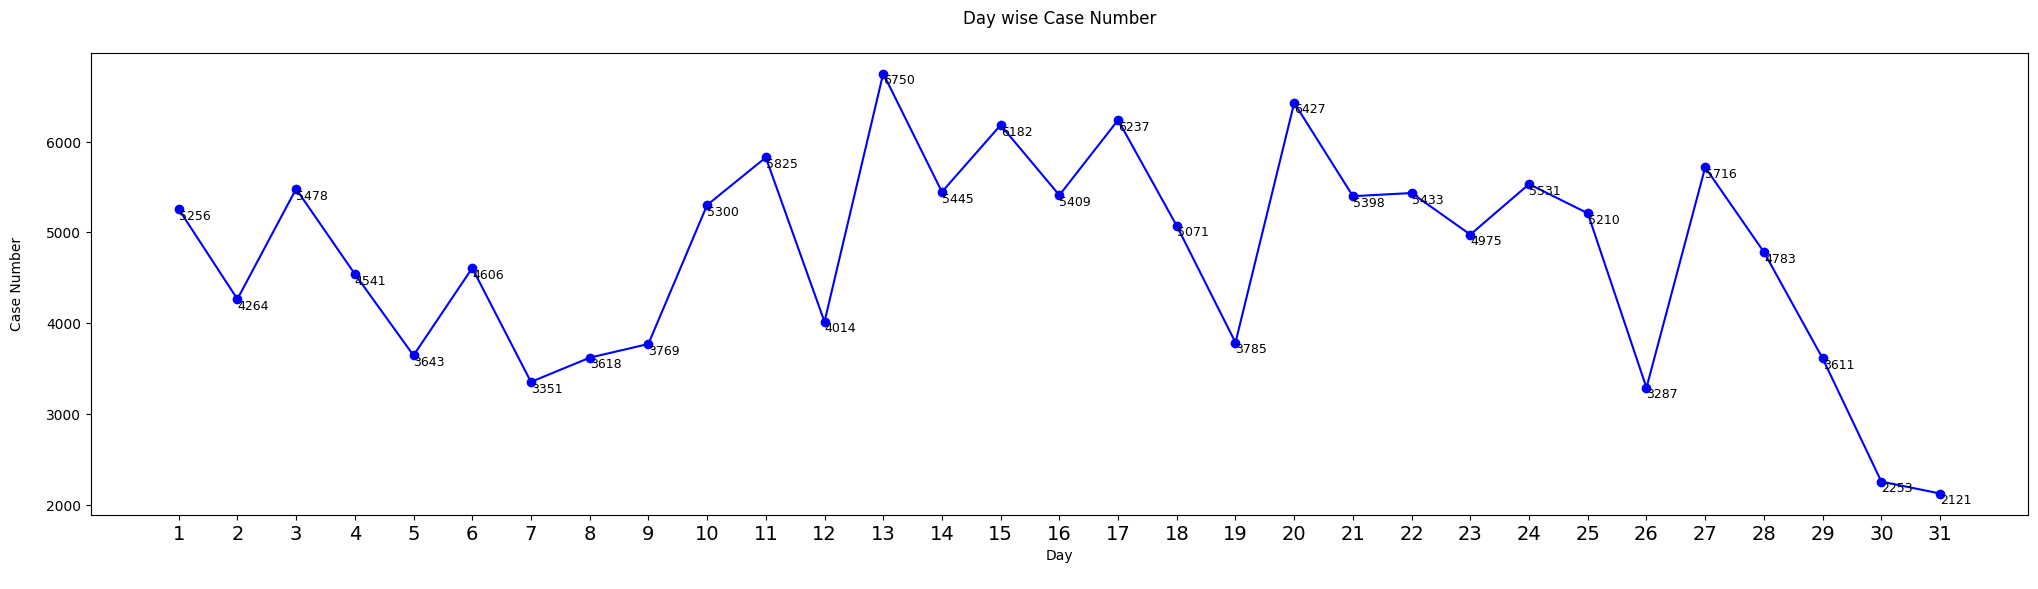

In [294]:
# Create DataFrame
df_new = total_patient_sum_day

# Set the figure size
plt.figure(figsize=(25, 6))

# Create the line chart
plt.plot(df_new['Day'], df_new['Case Number'], marker='o', linestyle='-', color='b')
days = range(1, 32)
plt.xticks(days, fontsize = 14)
for x, y in zip(df_new['Day'], df_new['Case Number']):
    plt.text(x, y, str(y), ha='left', va='top', fontsize=9)

# Add labels and title
plt.xlabel('Day\n')
plt.ylabel('Case Number\n')
plt.title('Day wise Case Number\n')

# Show the plot
plt.show()

After analysis of patient admission based on different month and day, I can say that date of 13th is the highest patient count and day of 31st is low.

#What is the maximum and minimum time period form claim settle

In [295]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [296]:
#Relevant dataframe
claim_df = df[["Claim Raised Date", "Claim Paid Date"]]
claim_df = claim_df[~claim_df["Claim Raised Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
claim_df = claim_df[~claim_df["Claim Paid Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
claim_df["Claim Raised Date"] = pd.to_datetime(claim_df["Claim Raised Date"])
claim_df["Claim Paid Date"] = pd.to_datetime(claim_df["Claim Paid Date"])
# claim_df.shape
# claim_df.isnull().sum()
claim_df = claim_df.dropna()
claim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116531 entries, 0 to 159339
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Claim Raised Date  116531 non-null  datetime64[ns]
 1   Claim Paid Date    116531 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.7 MB


In [297]:
# claim_df["Claim Raised Date"].dt.year.unique()
# claim_df["Claim Paid Date"].dt.year.unique()

In [298]:
claim_df["Claim_Paid_Duration"] = claim_df["Claim Paid Date"] - claim_df["Claim Raised Date"]
claim_df["Claim_Paid_Duration"] = claim_df["Claim_Paid_Duration"].abs()
claim_df.head()

,Claim Raised Date,Claim Paid Date,Claim_Paid_Duration
0,2023-03-22 14:33:45,2023-03-28,5 days 09:26:15
1,2023-02-16 00:15:01,2023-02-22,5 days 23:44:59
2,2023-02-13 10:42:06,2023-02-22,8 days 13:17:54
3,2023-02-16 00:07:00,2023-02-22,5 days 23:53:00
4,2023-02-23 23:46:52,2023-02-24,0 days 00:13:08


In [299]:
#Maximum time taken
claim_df["Claim_Paid_Duration"].max()

Timedelta('101 days 00:08:57')

In [300]:
#Miniimum time taken
claim_df["Claim_Paid_Duration"].min()

Timedelta('0 days 00:00:10')

After analysing claim history I found that maximum 101 days can be taken for claim settle and minimum same day.

#Finding an observation on paid amount for different hospital based on each district of hospital.

In [301]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [302]:
#Relevant dataframe
claim_amount_df = df[["Hospital District", "Hospital Name", "Amount paid to Hospital"]]
# claim_amount_df.shape
# claim_amount_df.info()
claim_amount_df = claim_amount_df[~claim_amount_df["Hospital District"].isin(["Claim under Process", "Claim Yet to be initiated"])]
# claim_amount_df.info()
# len(claim_amount_df[claim_amount_df["Hospital Name"].isin(["Claim under Process", "Claim Yet to be initiated"])])
# len(claim_amount_df[claim_amount_df["Amount paid to Hospital"].isin(["Claim under Process", "Claim Yet to be initiated"])])
claim_amount_df.head()

,Hospital District,Hospital Name,Amount paid to Hospital
0,RANCHI,CHC CHANHO,2750
1,RANCHI,Sadar Hospital,2541
2,GODDA,hopewell hospital,6750
3,RANCHI,Sadar Hospital,2541
4,RANCHI,Sadar Hospital,16698


In [303]:
#Treatement amount collection by each hospital
amount_df = claim_amount_df.groupby(["Hospital Name"])["Amount paid to Hospital"].sum()
hos_amount_df = amount_df.to_frame()
hos_amount_df.reset_index(inplace = True)
hos_amount_df.rename(columns = {"Amount paid to Hospital":"Total_amount_paid_to_hospital"}, inplace = True)
hos_amount_df.sort_values(by = ["Total_amount_paid_to_hospital"], ascending = False).set_index(pd.RangeIndex(start = 1, stop = len(hos_amount_df)+1)).head(20)

,Hospital Name,Total_amount_paid_to_hospital
1,Sadar Hospital,97224223
2,HZB Arogyam Multispeciality Hospital,19405059
3,SHAMBHAVI CENTRE FOR CANCER AND GYNAECOLOGY,18087124
4,Curie Abdur Razzaque Ansari Cancer Institute,17110490
5,DISTRICT HOSPITAL KODERMA,15970357
6,SHREE VISHWANATH NURSING HOME,14466747
7,Patliputra Medical College & Hospital,13325690
8,RANI HOSPITAL,12774704
9,DEVKAMAL HOSPITAL AND RESEARCH CENTRE,12056319
10,PATLIPUTRA NURSING HOME,11173860


In [304]:
#Treatement amount collection by each hospital for every district
dis_amount_df = claim_amount_df.groupby(["Hospital District","Hospital Name"])["Amount paid to Hospital"].sum()
dis_hos_amount_df = dis_amount_df.to_frame()
dis_hos_amount_df.reset_index(inplace = True)
dis_hos_amount_df.rename(columns = {"Amount paid to Hospital":"Total_amount_paid_to_hospital"}, inplace = True)
dis_hos_amount_df.sort_values(by = ["Total_amount_paid_to_hospital"], ascending = False).head(20)

,Hospital District,Hospital Name,Total_amount_paid_to_hospital
738,RANCHI,Sadar Hospital,58998615
395,HAZARIBAGH,HZB Arogyam Multispeciality Hospital,19405059
729,RANCHI,SHAMBHAVI CENTRE FOR CANCER AND GYNAECOLOGY,18087124
680,RANCHI,Curie Abdur Razzaque Ansari Cancer Institute,17110490
466,KODERMA,DISTRICT HOSPITAL KODERMA,15970357
309,GIRIDIH,SHREE VISHWANATH NURSING HOME,14466747
178,DHANBAD,Patliputra Medical College & Hospital,13325690
720,RANCHI,RANI HOSPITAL,12774704
682,RANCHI,DEVKAMAL HOSPITAL AND RESEARCH CENTRE,12056319
242,EAST SINGHBUM,Sadar Hospital,11902504


#Checking whether  patient's pay additional amount or not for their treatement apart from insurance claim.

In [305]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [306]:
#Relevant dataframe
claim_ration = df[["Amount paid to Hospital", "Claim Paid Amount"]]
claim_ration = claim_ration[~claim_ration["Amount paid to Hospital"].isin(["Claim under Process", "Claim Yet to be initiated"])]
claim_ration = claim_ration[~claim_ration["Claim Paid Amount"].isin(["Claim under Process", "Claim Yet to be initiated"])]
claim_ration["Claim Paid Amount"] = claim_ration["Claim Paid Amount"].astype(int)
claim_ration["Amount paid to Hospital"] = claim_ration["Amount paid to Hospital"].astype(int)
# claim_ration.info()
claim_ration["Tratement_amount_paid_difference"] = claim_ration["Amount paid to Hospital"] - claim_ration["Claim Paid Amount"]
claim_ration.head()

,Amount paid to Hospital,Claim Paid Amount,Tratement_amount_paid_difference
0,2750,2750,0
1,2541,2541,0
2,6750,6750,0
3,2541,2541,0
4,16698,16698,0


In [307]:
#minimum difference
claim_ration["Tratement_amount_paid_difference"].min()

0

In [308]:
#maximum difference
claim_ration["Tratement_amount_paid_difference"].max()

0

After analysing of difference between "Claim Paid Amount" and "Amount paid to Hospital", I found that minimum and maximum differnce is zero. It means that patient's not paid any aditional amount for their treatement without insurance claim.




#Minimum, Maximum and average tratement charge

In [309]:
df.head()

,Case Number,Claim_Status,Family ID,Gender,Patient's Home District,Speciality,treating_doc_name,Hospital Name,Hospital District,Admission Date,Discharge Date,Claim Raised Date,Claim Paid Date,Amount paid to Hospital,Claim Paid Amount,Procedure,Year
0,CASE/PS5/HOSP20G12233/P2232499,Claim Paid,5fc618d6-7ef8-11e5-a727-d89d671b89d8,Female,RANCHI,Obstetrics Gynaecology,DR SARITA KACHHAP,CHC CHANHO,RANCHI,2023-02-10 00:00:00,2023-02-11 06:30:00,2023-03-22 14:33:45,2023-03-28 00:00:00,2750,2750,Secondary suturing of episiotomy,2023
1,CASE/PS5/HOSP20G12045/P2232504,Claim Paid,2f4d6010-7e25-11e5-a727-d89d671b89d8,Male,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:15:01,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
2,CASE/PS5/HOSP20P125326/P2232496,Claim Paid,7f975952-7eca-11e5-a727-d89d671b89d8,Male,GODDA,Opthalmology,68542,hopewell hospital,GODDA,2023-02-10 00:00:00,2023-02-11 23:50:00,2023-02-13 10:42:06,2023-02-22 00:00:00,6750,6750,Phaco emulsification with foldable hydrophobic acrylic IOL,2023
3,CASE/PS5/HOSP20G12045/P2232507,Claim Paid,55d5e26c-6614-487b-af82-4104c0a80129,Female,RANCHI,General Medicine,DR MAYUKH KUMAR,Sadar Hospital,RANCHI,2023-02-10 00:00:00,2023-02-11 18:30:00,2023-02-16 00:07:00,2023-02-22 00:00:00,2541,2541,Acute gastroenteritis with moderate dehydration,2023
4,CASE/PS5/HOSP20G12045/P2232506,Claim Paid,55bc8d9a-78d0-4c07-a087-4f3bc0a80129,Female,RANCHI,General Medicine,DR ABHIJIT RAVI,Sadar Hospital,RANCHI,2023-02-03 00:00:00,2023-02-10 10:10:00,2023-02-23 23:46:52,2023-02-24 00:00:00,16698,16698,Acute gastroenteritis with moderate dehydration,2023


In [310]:
df.shape

(169108, 17)

In [311]:
#Relevant dataset
treatement_charge_df = df[["Case Number","Claim Paid Date","Claim Paid Amount", "Patient's Home District", "Procedure"]]
treatement_charge_df = treatement_charge_df[~treatement_charge_df["Claim Paid Date"].isin(["Claim under Process", "Claim Yet to be initiated"])]
treatement_charge_df = treatement_charge_df[~treatement_charge_df["Claim Paid Amount"].isin(["Claim under Process", "Claim Yet to be initiated"])]
treatement_charge_df = treatement_charge_df[~treatement_charge_df["Patient's Home District"].isin(["Claim under Process", "Claim Yet to be initiated"])]
treatement_charge_df = treatement_charge_df[~treatement_charge_df["Procedure"].isin(["Claim under Process", "Claim Yet to be initiated"])]
treatement_charge_df = treatement_charge_df.dropna()
# treatement_charge_df.isnull().sum()
treatement_charge_df["Claim Paid Date"]  = pd.to_datetime(treatement_charge_df["Claim Paid Date"])
treatement_charge_df["Month"] = treatement_charge_df["Claim Paid Date"].dt.month_name()
# treatement_charge_df.info()
treatement_charge_df.head()

,Case Number,Claim Paid Date,Claim Paid Amount,Patient's Home District,Procedure,Month
0,CASE/PS5/HOSP20G12233/P2232499,2023-03-28,2750,RANCHI,Secondary suturing of episiotomy,March
1,CASE/PS5/HOSP20G12045/P2232504,2023-02-22,2541,RANCHI,Acute gastroenteritis with moderate dehydration,February
2,CASE/PS5/HOSP20P125326/P2232496,2023-02-22,6750,GODDA,Phaco emulsification with foldable hydrophobic acrylic IOL,February
3,CASE/PS5/HOSP20G12045/P2232507,2023-02-22,2541,RANCHI,Acute gastroenteritis with moderate dehydration,February
4,CASE/PS5/HOSP20G12045/P2232506,2023-02-24,16698,RANCHI,Acute gastroenteritis with moderate dehydration,February


In [312]:
#minimum treatement amount
min_treatement_amount  = treatement_charge_df['Claim Paid Amount'].min()
min_treatement_amount

2

In [313]:
#maximum treatement amount
max_treatement_amount = treatement_charge_df['Claim Paid Amount'].max()
max_treatement_amount

100000

In [314]:
#Average tratement amount
avg_treatement_amount = treatement_charge_df['Claim Paid Amount'].mean().astype(int)
avg_treatement_amount

9334

In [315]:
#Investment amount per month
inv_df = treatement_charge_df.groupby(["Month"])["Claim Paid Amount"].sum()
inv_amount_df = inv_df.to_frame()
inv_amount_df.reset_index(inplace = True)
inv_amount_df = inv_amount_df.rename(columns = {"Claim Paid Amount": "Monthly_amount"})
inv_amount_df.sort_values(by = ["Monthly_amount"], ascending = False).set_index(pd.RangeIndex(start = 1, stop = len(inv_amount_df)+1))

,Month,Monthly_amount
1,May,339961163
2,March,296869643
3,April,292314963
4,June,106681714
5,February,51766561


In [316]:
#Investment amount per month and district
inv_dis_df = treatement_charge_df.groupby(["Month","Patient's Home District"])["Claim Paid Amount"].sum()
inv_dist_amount_df = inv_dis_df.to_frame()
inv_dist_amount_df.reset_index(inplace = True)
inv_dist_amount_df = inv_dist_amount_df.rename(columns = {"Claim Paid Amount": "Monthly_amount"})
inv_dist_amount_df.sort_values(by = ["Month"], ascending = False).set_index(pd.RangeIndex(start = 1, stop = len(inv_dist_amount_df)+1))

,Month,Patient's Home District,Monthly_amount
1,May,WEST SINGHBHUM,13876742
2,May,JAMTARA,3592147
3,May,BOKARO,22163320
4,May,CHATRA,9862712
5,May,DEOGHAR,16939052
6,May,DHANBAD,24088374
7,May,DUMKA,9509092
8,May,EAST SINGHBUM,26186450
9,May,GIRIDIH,22729909
10,May,GODDA,15837411


Above analysis express about minimum, maximum and avegare treatement amount also, monthly tratement budget as per different district.

In [317]:
pd.set_option('display.max_colwidth', None)

In [318]:
#Average treatement amount for different Procedure
Procedure_df = treatement_charge_df[["Claim Paid Amount", "Procedure"]]
Procedure_amount_df = Procedure_df.groupby(["Procedure"])["Claim Paid Amount"].mean().astype(int)
Procedure_amount_df = Procedure_amount_df.to_frame()
Procedure_amount_df.reset_index(inplace = True)
Procedure_amount_df.head()

,Procedure,Claim Paid Amount
0,percent Total Body Surface Area Burns (TBSA) - any percent (not requiring admission). Needs at least 5-6 dressing,7040
1,"percent Total Body Surface Area Burns (TBSA): 40 percent - 60 percent; Includes percent TBSA skin grafted, flap cover, follow-up dressings etc. as deemed necessary; Surgical procedures are required for deep burns that are not amenable to heal with dressings alone.",35258
2,"percent Total Body Surface Area Burns (TBSA): > 60 percent; Includes percent TBSA skin grafted, flap cover, follow-up dressings etc. as deemed necessary; Surgical procedures are required for deep burns that are not amenable to heal with dressings alone.",36595
3,"percent Total Body Surface Area Burns (TBSA): Upto 40 percent; Includes percent TBSA skin grafted, flap cover, follow-up dressings etc. as deemed necessary; Surgical procedures are required for deep burns that are not amenable to heal with dressings alone.",37702
4,5 FU + Leucovorin + Oxaliplatin 5 FU 1200mg/m2 D1 D2 Leucovorin 400mg/m2 D1 Oxaliplatin 85 mg/m2 D1 every 14 days,12721


#Conclusion:

In conclusion, the data analysis conducted in this project provided valuable insights into the healthcare claims processing workflow. By examining the dataset, we gained a deeper understanding of various aspects related to healthcare claims, including claim status, medical specialties, claim amounts, admission and discharge dates, and treating healthcare providers.

The analysis revealed patterns in claim approvals and rejections, helping to identify areas for process improvement and efficiency. It also shed light on the most common medical procedures and specialties involved in the claims, aiding in resource allocation and healthcare planning.

Moreover, the examination of claim amounts paid by insurance companies allowed us to understand the average costs of different medical treatments and procedures. This information is vital for cost analysis, budgeting, and negotiating contracts with healthcare providers.

By analyzing the data related to hospitals and districts, we identified patterns in claim distribution, resource utilization, and potential disparities in healthcare access. This knowledge can help in optimizing healthcare facilities' locations and ensuring better healthcare availability.

Overall, the data analysis provided valuable insights that can support informed decision-making for healthcare administrators, insurance companies, policymakers, and other stakeholders involved in healthcare claims management. The findings can be used to optimize workflows, improve efficiency, and enhance the overall effectiveness of the claims processing system, ultimately leading to better healthcare services and patient care.




